In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x = dataset.iloc[:,3:5].values

In [5]:
from sklearn.cluster import OPTICS
DB = OPTICS(min_samples=2)
DB.fit(x)

C:\Users\YAS\Anaconda3\envs\project-1\lib\site-packages\sklearn\cluster\_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(min_samples=2)

In [6]:
r= DB.core_distances_
r

array([ 2.23606798,  4.12310563,  2.        ,  1.41421356,  2.23606798,
        1.41421356,  2.        ,  5.09901951,  3.16227766,  4.47213595,
        1.41421356,  4.12310563,  1.41421356,  2.        ,  1.41421356,
        2.        ,  3.        ,  6.32455532,  5.83095189,  4.12310563,
        3.        ,  1.        ,  5.09901951,  1.        ,  5.        ,
        5.09901951,  1.41421356,  8.60232527,  1.41421356,  5.09901951,
        3.        ,  4.        ,  3.        ,  5.        ,  3.16227766,
        5.09901951,  3.16227766,  3.60555128,  2.82842712,  3.60555128,
        1.41421356,  5.        ,  1.41421356,  3.16227766,  2.82842712,
        4.        ,  3.16227766,  3.60555128,  0.        ,  0.        ,
        2.23606798,  1.        ,  2.23606798,  1.        ,  1.41421356,
        3.16227766,  2.23606798,  1.41421356,  1.41421356,  2.        ,
        1.        ,  1.        ,  1.41421356,  1.        ,  1.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  1.  

In [12]:
DB.leaf_size

30

In [7]:
y_means = DB.fit_predict(x)
y_means

C:\Users\YAS\Anaconda3\envs\project-1\lib\site-packages\sklearn\cluster\_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


array([ 0, -1, 35, 29,  0, 29, 35, 46, 35, -1, 34, 46, 34, 30, 34, 30,  1,
       -1, -1, 46,  1, 28, 36, 28, 33, 31,  2, -1,  2, 31, 36, 27, 36, 32,
       33, 31, 33, 27,  3, 27,  4, 32,  4, 13,  3, -1, -1, -1,  5,  5,  9,
       13,  9, 13,  6,  5, -1,  6,  8,  6, 10, 10,  8, 12,  8, 12,  8,  7,
       12,  7, 11, -1, -1, 11, 14, 16, 16, 14, 16, 15, 16, 16, 15, -1, 16,
       14, 18, 17, 18, -1, 17, -1, 21, -1, 23, -1, -1, 21, 23, 21, 23, 20,
       -1, 19, 19, 23, -1, 22, 23, 20, -1, 19, -1, 22, -1, -1, -1, 24, -1,
       24, 24, -1, 24, 51, -1, 48, 25, 51, 39, 48, 39, 48, 25, 47, 40, 51,
       40, 47, -1, 47, 40, 51, 26, 51, -1, 51, 26, 49, 37, 51, 38, 51, 37,
       50, 38, 51, 41, 50, 41, 49, 26, -1, -1, 51, 44, 54, 42, 52, 44, 54,
       42, 54, 42, 52, 42, -1, 42, 54, 42, 53, 45, 53, 42, 53, 45, -1, 43,
       55, 42, 53, 43, 55, 56, -1, 56, 57, -1, 57, -1, 57])

In [8]:
Supervised = dataset
Supervised["Cluster_Group"] = y_means
Supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,35
3,4,Female,23,16,77,29
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,57
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,57
198,199,Male,32,137,18,-1


In [23]:
Supervised.to_csv('groups.csv',index=False)

C:\Users\YAS\Anaconda3\envs\project-1\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


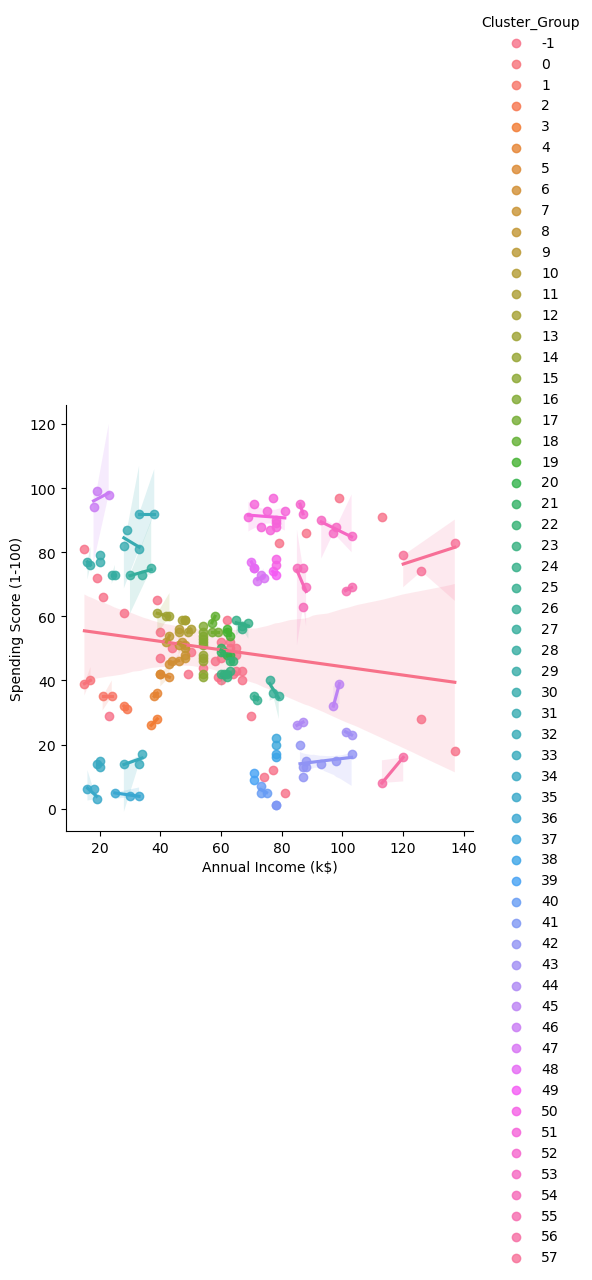

In [9]:
import seaborn as sns
graph = sns.lmplot(Supervised, x = Supervised.columns[3],y = Supervised.columns[4],  hue = Supervised.columns[5],
                   fit_reg=True,legend=True,legend_out=True)